In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
#Read CSV
merge_output = pd.read_csv("./zillow_census_m_OUTPUT.csv")


In [15]:
#Fill NaN with 0 (NaN values are for international migration. We are only interested in domestic migration)
merge_output = merge_output.fillna(0)

In [21]:
#Split County into two County and State columns
county_split = merge_output["County"].str.split(pat=', ', expand=True)
merge_output["State"] = county_split[1]
merge_output['State'].nunique()
merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,state,county,2010IN,2010NET,2011IN,2011NET,...,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State
0,0,"Ada County, Idaho",26673.0,4034.0,3136,196,25963.0,3388.0,22795.0,1299.0,...,14500,24400.0,-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008,Idaho
1,1,"Adair County, Missouri",2389.0,643.0,1537,53,2245.0,547.0,2602.0,826.0,...,5400,5400.0,-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417,Missouri
2,2,"Adams County, Colorado",36313.0,5386.0,1336,167,36404.0,4927.0,36864.0,3041.0,...,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado
3,3,"Adams County, Idaho",190.0,-97.0,112,21,192.0,-8.0,237.0,123.0,...,11600,38300.0,-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569,Idaho
4,4,"Adams County, Illinois",1904.0,-65.0,833,49,1622.0,-392.0,1577.0,-349.0,...,3100,1300.0,1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459,Illinois


In [32]:
#Get total NetValues
merge_output_net = merge_output.loc[:, ["State", "County", "2010 Percent Change", "2011 Percent Change", "2012 Percent Change", "2013 Percent Change", "2014 Percent Change", "2015 Percent Change", "2016 Percent Change"]]
merge_output_net.head()

,State,County,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change
0,Idaho,"Ada County, Idaho",-8.181316,-7.043949,6.282383,15.661182,4.109589,7.338057,11.504008
1,Missouri,"Adair County, Missouri",-11.207970,-4.207574,-1.464129,0.000000,5.943536,7.573633,7.040417
2,Colorado,"Adams County, Colorado",-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462
3,Idaho,"Adams County, Idaho",-10.820669,-3.340150,2.538787,8.940853,5.429293,6.946108,21.444569
4,Illinois,"Adams County, Illinois",1.573034,0.331858,1.764057,0.975081,2.789700,3.235908,1.314459


In [33]:
#Groupby State
state_migration = merge_output_net.groupby(["State"], as_index=False).sum()
state_migration

,State,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change
0,Alabama,-95.500862,-82.678963,-9.914672,57.456556,42.557802,102.113426,149.279329
1,Arizona,-131.774533,-79.240987,96.049011,109.017350,74.221258,67.603303,91.008024
2,Arkansas,-59.184888,-35.606182,44.147819,6.290611,48.363961,128.058265,188.417330
3,California,-305.103269,-437.177450,381.846849,935.899935,393.912712,482.114094,476.046388
4,Colorado,-224.479534,-126.379079,159.403258,251.477616,266.004505,387.387340,306.512167
5,Connecticut,-30.695021,-33.073587,-26.341175,17.573912,1.792623,0.587976,22.193353
6,Florida,-520.769635,-327.350159,127.003830,476.204388,402.147091,508.111349,559.856512
7,Georgia,-759.888674,-930.100718,200.371177,575.430713,509.688771,415.805243,654.554105
8,Hawaii,-14.211421,-17.513994,13.791614,53.120000,32.503519,17.715252,26.836406
9,Idaho,-280.766733,-99.519199,118.103561,281.531145,197.687243,280.977858,307.418660


In [38]:
#Create column that has net total migration
state_migration["Total"] = state_migration.sum(axis=1)

#Reassign columns
state_migration.columns = ['State','2010','2011', '2012', '2013', '2014', '2015','2016', 'Total']
state_migration.head()


,State,2010,2011,2012,2013,2014,2015,2016,Total
0,Alabama,-95.500862,-82.678963,-9.914672,57.456556,42.557802,102.113426,149.279329,326.625232
1,Arizona,-131.774533,-79.240987,96.049011,109.017350,74.221258,67.603303,91.008024,453.766851
2,Arkansas,-59.184888,-35.606182,44.147819,6.290611,48.363961,128.058265,188.417330,640.973834
3,California,-305.103269,-437.177450,381.846849,935.899935,393.912712,482.114094,476.046388,3855.078516
4,Colorado,-224.479534,-126.379079,159.403258,251.477616,266.004505,387.387340,306.512167,2039.852545


<Figure size 7200x4800 with 0 Axes>

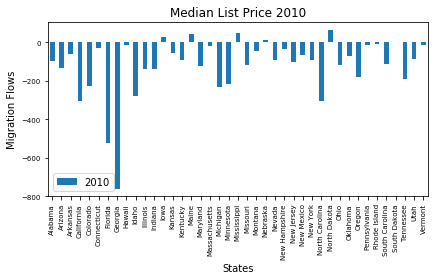

<Figure size 7200x4800 with 0 Axes>

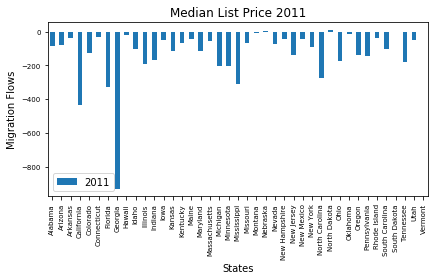

<Figure size 7200x4800 with 0 Axes>

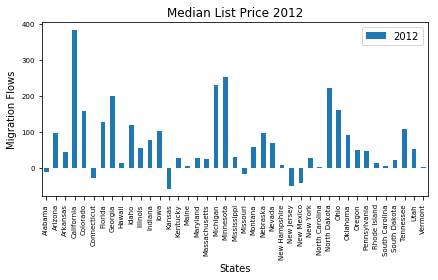

<Figure size 7200x4800 with 0 Axes>

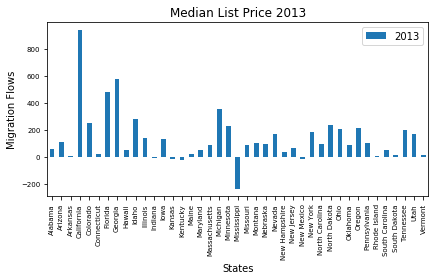

<Figure size 7200x4800 with 0 Axes>

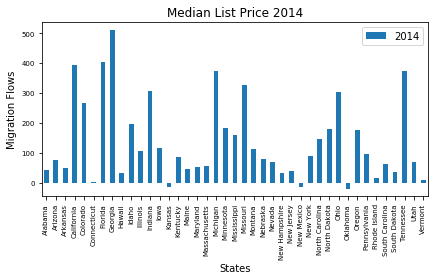

<Figure size 7200x4800 with 0 Axes>

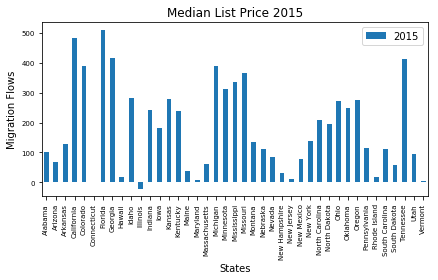

<Figure size 7200x4800 with 0 Axes>

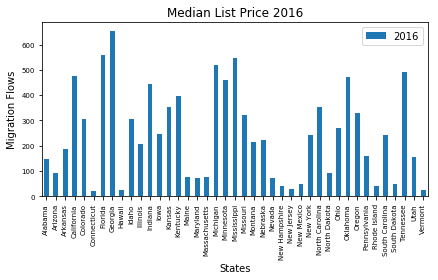

<Figure size 7200x4800 with 0 Axes>

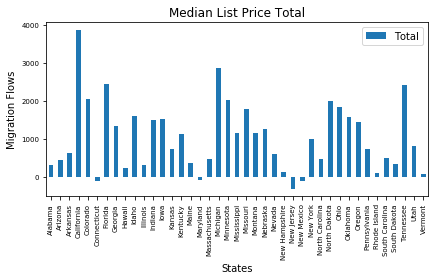

In [40]:
states_of_interes = state_migration.loc[]